# DESAFIO 4: Estructurando un Proyecto de DS (parte II)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('bmh')

## DATASET: COVID 19 Progreso mundial de vacunación

El set de datos incluye información acerca de las vacunaciones por COVID desde Diciembre de 2020 a Marzo de 2022. Se analizó la relación que existen entre el País, fecha, cantidad de personas vacunadas, vacunaciones diarias, personas con esquema completo.

Este conjunto de datos brinda la oportunidad de hacer preguntas como:
* ¿Qué vacuna utiliza cada país?
* ¿En qué país el programa de vacunación está más avanzado?
* ¿Dónde se vacunan más personas por día?

## 1.- Objetivo
Conocer el programa de vacunaciones por COVID.

## 2.- Contexto Comercial
Construir visualizaciones que ayuden a identificar patrones en el proceso de vacunación por COVID a nivel mundial para saber si las personas seguirán con el programa de vacunación en el futuro.

## 3.- Problema Comercial
* Qué país a realizado más vacunaciones?
* En que año se realizaron más vacunaciones?

## 4.- Contexto analítico
Se ha proporcionado un archivo CSV que contiene detalles acerca de las vacunaciones por COVID, por ejemplo, país, fecha, total de vacunaciones, total de personas vacunadas, total de personas vacunadas por día y vacunas utilizadas.
Se deben realizar las siguentes tareas con los datos:
* Leer, transformar y preparar datos para su visualización.
* Realizar análisis y construir visualizaciones de los datos para identificar patrones.


In [2]:
data = pd.read_csv('../datasets/covid_vaccinations/country_vaccinations.csv')
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [3]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000
mean,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157
std,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000
50%,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000
75%,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000
max,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.370000,124.760000,122.370000,117497.000000


In [4]:
data.describe(include=object)

,country,iso_code,date,vaccines,source_name,source_website
count,86512,86512,86512,86512,86512,86512
unique,223,223,483,84,81,119
top,Norway,NOR,2021-08-19,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,https://covid19.who.int/
freq,482,482,220,7608,26822,25951


De las tablas anteriores podemos concluir que:
1. Se analizaron 223 paises y hay un total de 483 días analizados
2. El total de vacunaciones va entre 0 (posibles valores nulos) y 3263129000, siendo la media de 3590096
3. Las personas vacunadas entre 0 (posibles valores nulos) y 1275541000, siendo la media de 2187310
4. Las vacunaciones diarias entre 0 (posibles valores nulos) y 22424290, siendo la media de 7343.

In [5]:
data.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

Acá podemos ver que hay muchos valores vacios, y hay que tratarlos antes de analizar la información.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [7]:
# Convertir DATE a formato fecha
data['date'] = pd.to_datetime(data['date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   43607 non-null  float64       
 4   people_vaccinated                    41294 non-null  float64       
 5   people_fully_vaccinated              38802 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86213 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null  float64       
 10  people_ful

## 5.- Exploración de datos

### Verificación de datos nulos
Para el correcto tratamiento de los datos se verificarán los casos en los que sucedieron, ya que pueden existir casos que son anormales pero existentes, por ejemplo, 0 total de vacunaciones.

En este caso creo que es posible que los valores sean nulos, ya que el dataset esta separado por días y en esos casos puede haberse no llevado a cabo la vacunación o dejarse vacio. Pero como los datos nulos o NaN no nos sirven para el modelo, los vamos a eliminar.

In [9]:
# Eliminar valores NaN de people_vaccinated
data = data[data['people_vaccinated'].notna()]
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.30,0.30,NaN,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.60,0.60,NaN,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [10]:
# Eliminar valores 0.0 de people_vaccinated
data = data.loc[data['people_vaccinated'] != 0.0]
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.30,0.30,NaN,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.60,0.60,NaN,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,NaN,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


### Qué paises son más considerados en el análisis?

<AxesSubplot:>

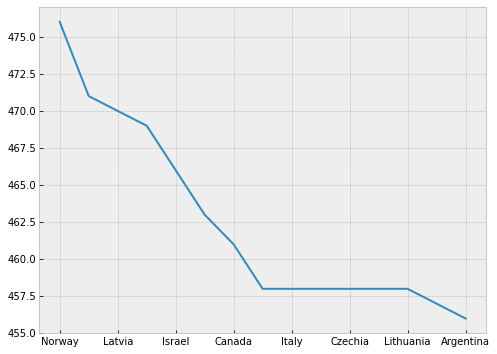

In [11]:
temp = data['country'].value_counts().head(15)
temp.plot.line(figsize=(8, 6))

- Se muestra los 15 paises con mayor cantidad de datos
- El comporamiento de los datos es diferente para cada país
- Hay que tener en cuenta la cantidad de personas de cada país para comparar con los datos.

### En que periodos tenemos más datos?

<AxesSubplot:xlabel='date'>

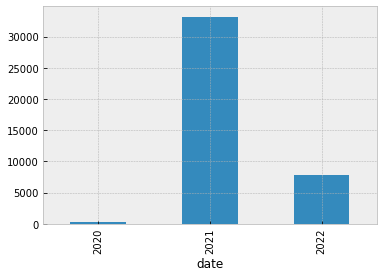

In [12]:
# Agrupar por año
temp = data.groupby(data['date'].dt.to_period('Y')).size()
temp.plot.bar()

<AxesSubplot:xlabel='date'>

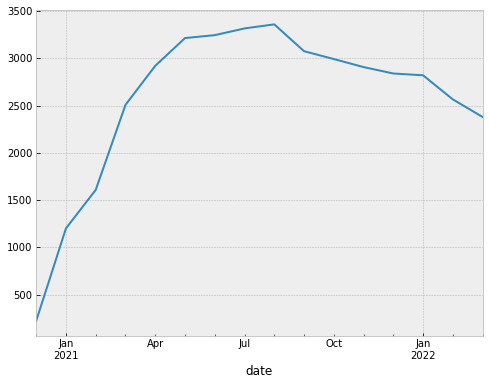

In [13]:
# Agrupar por mes
temp = data.groupby(data['date'].dt.to_period('M')).size()
temp.plot.line(figsize=(8, 6))

- Se puede ver que hay mayor densidad de datos en el año 2021 entre Junio y Enero de 2022.

### Promedio de personas vacunadas por país (15 mayores)?

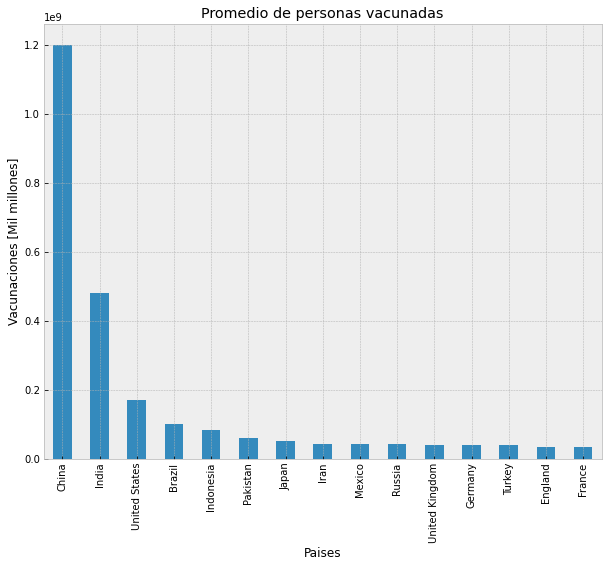

In [30]:
# Agrupar por país
temp = data.groupby('country').mean().sort_values('people_vaccinated', ascending=False)

fix, ax = plt.subplots(figsize=(15, 8))
ax = temp['people_vaccinated'].head(15).plot.bar(figsize=(10, 8))
ax.set_title('Promedio de personas vacunadas')
ax.set_xlabel('Paises')
ax.set_ylabel('Vacunaciones [Mil millones]')
plt.show()

In [31]:
temp.people_vaccinated.head(15)

country
China             1.200354e+09
India             4.820134e+08
United States     1.699053e+08
Brazil            1.019900e+08
Indonesia         8.276378e+07
Pakistan          6.083335e+07
Japan             5.266574e+07
Iran              4.504058e+07
Mexico            4.304561e+07
Russia            4.257046e+07
United Kingdom    4.126324e+07
Germany           4.116113e+07
Turkey            3.940265e+07
England           3.468312e+07
France            3.466866e+07
Name: people_vaccinated, dtype: float64

## 6.- Data Engineering (Obtención de insights)
Podemos ver que en China, India y Estados Unidos se vacunaron la mayor cantidad de personas entre Junio de 2021 y Enero de 2022.

## 7.- y 8.- Selección y Desarrollo del algoritmo-método
Para este dataset se decidió utilizar el modelo de forecasting que consiste en predecir el valor futuro de una serie temporal, bien modelando la serie únicamente en función de su comportamiento pasado (autorregresivo) o empleando otras variables externas.

In [15]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

In [16]:
# Agrupar por mes
period = data.groupby(data['date'].dt.to_period('D')).sum()
period.head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
date,,,,,,,,,
2020-12-04,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-07,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-08,6.0,6.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0
2020-12-09,9.0,9.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2020-12-10,7.0,7.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [17]:
y = pd.Series(period['people_vaccinated'].values, index=period.index)
y

date
2020-12-04    1.000000e+00
2020-12-07    2.000000e+00
2020-12-08    6.000000e+00
2020-12-09    9.000000e+00
2020-12-10    7.000000e+00
                  ...     
2022-03-25    2.764019e+09
2022-03-26    2.781163e+09
2022-03-27    2.945374e+09
2022-03-28    2.696730e+09
2022-03-29    2.363749e+09
Freq: D, Length: 479, dtype: float64

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

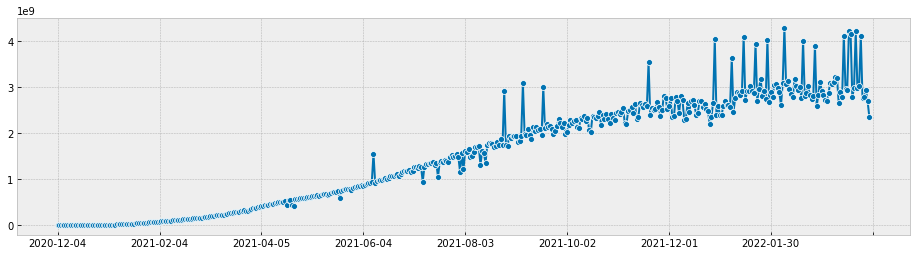

In [18]:
plot_series(y)

In [19]:
y_train, y_test = temporal_train_test_split(y)

In [20]:
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [21]:
forecaster = ThetaForecaster(sp=36)  # monthly seasonal periodicity
forecaster.fit(y_train) 

c:\Users\alk10\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ThetaForecaster(sp=36)

In [22]:
y_pred = forecaster.predict(fh)
y_pred

2021-11-30    2.720562e+09
2021-12-01    2.778852e+09
2021-12-02    2.745252e+09
2021-12-03    2.713627e+09
2021-12-04    2.739089e+09
                  ...     
2022-03-25    3.146665e+09
2022-03-26    3.258783e+09
2022-03-27    3.205979e+09
2022-03-28    3.386562e+09
2022-03-29    3.224757e+09
Freq: D, Length: 120, dtype: float64

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

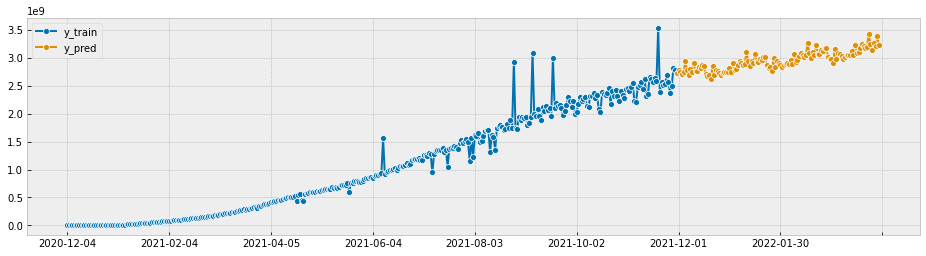

In [23]:
# plotting predictions and past data
plot_series(y_train, y_pred, labels=["y_train", "y_pred"])

In [24]:
mean_absolute_percentage_error(y_test, y_pred)

0.09962920005953038

## 9.- y 10.- Interpretación de resultados y conclusiones
1. El gráfico muestra que hay una tendencia alcista a que las personas se vacunen a lo largo del tiempo.
2. Se puede ver que hay mayor densidad de datos en el año 2021, entre Junio y Enero de 2022, Y el punto más alto de personas vacunadas fue en Julio 2021.
3. Los paises con mayor cantidad de personas vacunadas son China, India y Estados Unidos.